<a href="https://colab.research.google.com/github/gitnicolas343/Quamtum_machine_learning/blob/main/CLASSICAL_BIT_AND_QUAMTUM_BIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RESUMEN:**


---


Este capítulo introduce el Qubit como la unidad básica de la información y computación cuántica. Comienza revisando los bits clásicos (Cbits) y los Cbits aleatorios, y luego presenta el Qubit como una extensión algebraica del espacio de probabilidad bidimensional de un Cbit aleatorio a un vector complejo y normalizado en dos dimensiones. También se explican las dos formas principales en que un Qubit puede evolucionar: mediante operaciones unitarias (puertas cuánticas) y mediciones. Las puertas cuánticas describen la evolución en un sistema cerrado, mientras que las mediciones convierten la información cuántica en clásica al acoplar el Qubit con un instrumento de medición.

#1.BIT CLASICO ALETORIO  (RAMDOM  CBIT)
---
Podemos comenzar recordando qué significa un bit en la computación clásica. Todos hemos escuchado cómo funcionan los lenguajes discretos en las máquinas modernas, y por eso podemos imaginar un bit como un interruptor que solo puede estar en uno de dos estados posibles:

* 0 (apagado)

* 1 (encendido)

Para hacer una analogía, un bit clásico es como una moneda que solo puede mostrar cara o cruz, sin posibilidad de estar en ambos estados a la vez. Es decir, es un sistema que puede estar en dos niveles claramente distinguibles y mutuamente excluyentes, también llamados estados ortogonales.Imagine que está manipulando esta moneda en su mano y puede elegir mostrar cara o cruz; usted sabe de manera determinista cuál es el estado actual para los fines que se requieran y manipular los resultados de cada ensayo  a su antojo.

Este comportamiento binario, en el que el estado es perfectamente definido y conocido, es la base fundamental de toda la computación clásica y del procesamiento digital de información.Sin embargo, en muchos sistemas reales y aplicaciones, el estado no siempre es perfectamente definido o seguro. Por ejemplo, debido al ruido en la transmisión de datos, imperfecciones en sensores o incertidumbre inherente a ciertos procesos, no siempre podemos garantizar que el bit esté claramente en 0 o en 1.Es aquí donde surge el concepto de bits probabilísticos, que representan un bit cuyo estado no es determinista, sino que está definido por una distribución de probabilidades entre los estados 0 y 1.

Alternativamente un Cbit puede puede describirse como un estado bidimensional  llamado amplitud vectorial "one hot", El vector de amplitud one-hot contiene un único dígito "1", cuya posición indica el valor que toma el cbit. Específicamente:

* Un cbit con valor 0 se codifica mediante un vector one-hot que tiene un "1" en la primera posición.

* Un cbit con valor 1 se codifica mediante un vector one-hot que tiene un "1" en la segunda posición.

Así, la posición del "1" en el vector representa de forma clara y exclusiva el estado del cbit, se puede escribir en la notacion  de Dirac Bra-ket como se muestra en la tabla adjunta:

---

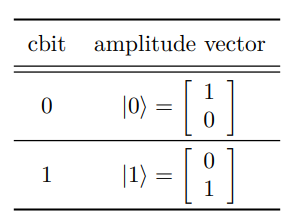

---

(tabla 1 :representacion de un digito binario como notacion one-hot paralelo con la notacin de dirac)


Es importante introducirnos en el estudio de la computacion cuantica, desde los formalismos matematicos, los cuales para la presente sesion nos limitaremos a las bases de la notacion Braket, importante para entender el paso de una computacion probabilistica Cbit (Clasical bits) a una cuantica  basada en Qbit (Quamtum bits).


# 2. **NOTACION DE DIRAC**
---

la notacion de Dirac puede parecer familiar para estudiantes de fisica, pero puede ser un alien para estudiantes de ingeniria o matematicas. Aunque en matematicas un vector puede representarse como   $\vec{a}$, en la notacion de dirac el simbolo identificador es este vector  $a$  dentro dentro de un 'ket',  $\ |a\rangle$ de la siguiente forma:
$$
|a\rangle = \begin{bmatrix} a_1 \\ a_2 \end{bmatrix}
$$


acorde a la representacion de la tabla 1, la representacion del 'ket' 0 y 1 son las siguientes respectivamente:

$$
|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}
\quad
|1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}
$$

la notacion de dirac 'bra' es usada para identificar la fila y se denota de la siguiente forma:
$$
\langle a| = \begin{bmatrix} a_1 & a_2 \end{bmatrix}
$$

donde:

$$
\langle a| = |a\rangle^\dagger
$$

teniendo en  que $\dagger$ representa La operacion  hermitica transpuesta o en otras la transpuesta conjugada:

$$
(.)^\dagger = ((.)^T)^*
$$
por ejemplo para el 1 y 0:

$$
\langle 0|  = \begin{bmatrix} 1 & 0 \end{bmatrix}
\quad
\langle 1 | = \begin{bmatrix} 0 & 1 \end{bmatrix}
$$

estos vectores son en esencia complejos  dimendionalmente finitos, dado que pertenecen a los llamados espacios de Hilbert  y se denotado por $\mathcal{H}$, aqui los espacios de interes  para computacion cuantica $2^n$  en la notacion de hilbert con $n\in\mathbb{Z}^+$.

Uno puede preguntarse por qué aprender una notación nueva y aparentemente extraña para los vectores, cuando podríamos simplemente usar la representación en vectores columna.

Una razón es que la notación de Dirac suele ahorrar espacio. Especialmente al escribir vectores dispersos (que tienen pocos componentes no nulos), la notación de Dirac es mucho más compacta.

Para estados con 2 o 3 qubits, esto no es tan complicado, pero imagine escribir un estado de 8 qubits con vectores columna: tendría $2^8=256$ componentes, lo cual sería bastante engorroso.

---
#**PRODUCTOS INTERNOS**
---

En nuestro contexto, un producto interno es una función que toma dos vectores del mismo espacio y devuelve un número complejo. En el contexto de espacios vectoriales complejos, esta operación permite extender la noción del producto punto de los vectores reales, respetando ciertas propiedades algebraicas.
Se denota como:

Sean $ \mathbf{v}, \mathbf{w} \in \mathbb{C}^n $, sus componentes son números complejos.  

El producto interno complejo se define como:

$$
\langle \mathbf{v}, \mathbf{w} \rangle = \sum_{i=1}^{n} v_i^* w_i
$$

asi:

$$
\begin{bmatrix} v_1 \\ v_2\\v_3\\...\\v_n\end{bmatrix}*\begin{bmatrix} w_1 \\ w_2\\w_3\\...\\w_n\end{bmatrix} = \begin{bmatrix}  v_1^* & v_2^*& v_3^*&...&v_n^* \end{bmatrix}*\begin{bmatrix}w_1 \\ w_2\\w_3\\...\\w_n\end{bmatrix} = \sum_{i=1}^{n} v_i^* w_i
$$

donde $v_i^*$ es el conjugado complejo del componente $v_i$.Esta definición generaliza el producto punto usual al caso complejo y garantiza las siguientes propiedades:

---
### Propiedades del producto interno complejo
---

**1. Linealidad en el segundo argumento**

Para una combinación lineal de vectores $\sum_i \lambda_i w_i$, se cumple:

$$
\langle v, \sum_i \lambda_i w_i \rangle = \sum_i \lambda_i \langle v, w_i \rangle
$$

---

**2. Conjugación simétrica (conjugate-commutativity)**

El producto interno conmutado es el conjugado complejo:

$$
\langle v, w \rangle = \langle w, v \rangle^*
$$

---

**3. No negatividad**

El producto interno de un vector consigo mismo siempre es real y no negativo:

$$
\langle v, v \rangle \geq 0
$$

Y se cumple la igualdad si y solo si $v = 0$.


